In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = "./housePricing.csv"
df = pd.read_csv(url)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print(len(df.columns))

81


In [ ]:
# Get a boolean mask indicating missing values in each column
print(df.isnull().any().head(10))

Id             False
MSSubClass     False
MSZoning       False
LotFrontage     True
LotArea        False
Street         False
Alley           True
LotShape       False
LandContour    False
Utilities      False
dtype: bool


In [ ]:
df.fillna(0, inplace=True)
df.head()
df.to_csv('housePricing_clean.csv', index=False)

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in categorical_cols:
    df[cols] = le.fit_transform(df[cols].astype(str)) # to handle mixed types of feature value
df.head()
df.to_csv('housePricing_encoded.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis') # cmap defines color (magma,Blues)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data (all columns)
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the normalized DataFrame
df_normalized.head()
df_normalized.to_csv('housePricing_normalized.csv', index=False)
df_normalized.describe()

Id   MSSubClass     MSZoning  LotFrontage      LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.500000     0.217043     0.757192     0.184100     0.043080   
std       0.288972     0.248827     0.158004     0.110749     0.046653   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.000000     0.750000     0.134185     0.029229   
50%       0.500000     0.176471     0.750000     0.201278     0.038227   
75%       0.750000     0.294118     0.750000     0.252396     0.048150   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     0.045205     0.647489     0.925799     0.000685  ...   
std       0.063996     0.186075     0.469719     0.235889     0.026171  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     0.000000     1.000000     0.000000  ...   
50%       1.000000     0.000000     1.000000     1.000000     0.000000  ...   
75%       1.000000     0.000000     1.000000     1.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

          PoolArea       PoolQC        Fence  MiscFeature      MiscVal  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.003738     0.003425     0.116781     0.026884     0.002806   
std       0.054441     0.052972     0.257298     0.138859     0.032008   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            MoSold       YrSold     SaleType  SaleCondition    SalePrice  
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  
mean      0.483811     0.453938     0.939127       0.754110     0.202779  
std       0.245784     0.332024     0.194013       0.220171     0.110321  
min       0.000000     0.000000     0.000000       0.000000     0.000000  
25%       0.363636     0.250000     1.000000       0.800000     0.132030  
50%       0.454545     0.500000     1.000000       0.800000     0.177892  
75%       0.636364     0.750000     1.000000       0.800000     0.248715  
max       1.000000     1.000000     1.000000       1.000000     1.000000  

[8 rows x 81 columns]

In [ ]:
from sklearn.decomposition import PCA

X = df_normalized.drop('SalePrice', axis=1)  # Adjust if 'SalePrice' is not your target
Y = df_normalized['SalePrice']

# Initialize PCA. n_components can be an integer for number of components or a float for variance explained
pca = PCA(n_components=4)

# Fit PCA to your data
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)
df_selected = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])  # Adjust column names as needed

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_ , marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'SalePrice' is your target variable
X_train = df_selected
Y_train = Y
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

plt.scatter(y_train, model.predict(x_train), s=50, c='blue', marker='o', alpha=0.7, label='Data Points')
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

Coefficients: [ 0.11418004 -0.00644517 -0.00784679  0.00054423]
Intercept: 0.20275413118107707


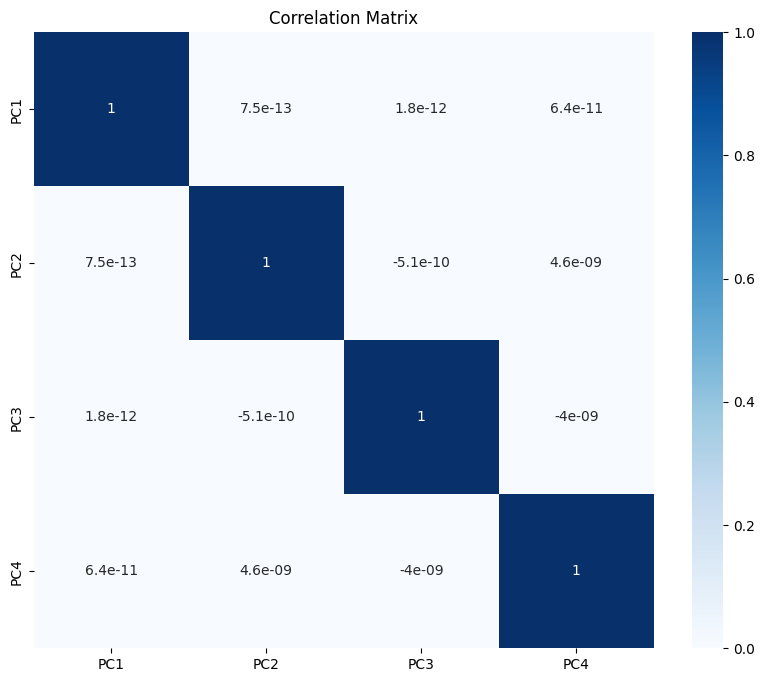

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_selected.corr()
# print(correlation_matrix)
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# write function to evaluate mean squared error

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# write function to evaluste mean squared error

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# write function to evaluate R-squared error

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


In [ ]:
# Evaluate performance based on training data
mse_train = mean_squared_error(y_train, model.predict(x_train))
rmse_train = mean_absolute_error(y_train, model.predict(x_train))
r2_train = r2_score(y_train, model.predict(x_train))

print('Training')
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)

# Evaluate performance based on test data
mse_test = mean_squared_error(y_test, model.predict(x_test))
rmse_test = mean_absolute_error(y_test, model.predict(x_test))
r2_test = r2_score(y_test, model.predict(x_test))

print('Testing')
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test)

Training
MSE: 0.004446398490490418
RMSE: 0.04530151843905478
R-squared: 0.6134405518416355
Testing
MSE: 0.005416386822723886
RMSE: 0.04685168622709033
R-squared: 0.6338310957186277


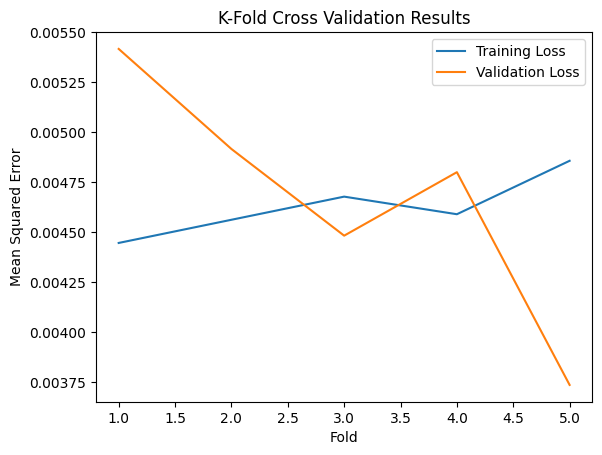

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming X_train, Y_train are your data and target
kf = KFold(n_splits=5, shuffle=True, random_state=42) # you can change number of splits

train_losses = []
val_losses = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    train_pred = model.predict(X_train_fold)
    val_pred = model.predict(X_val_fold)

    train_losses.append(mean_squared_error(y_train_fold, train_pred))
    val_losses.append(mean_squared_error(y_val_fold, val_pred))

# Plotting the results
plt.plot(range(1, kf.get_n_splits() + 1), train_losses, label='Training Loss')
plt.plot(range(1, kf.get_n_splits() + 1), val_losses, label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('K-Fold Cross Validation Results')
plt.legend()
plt.show()

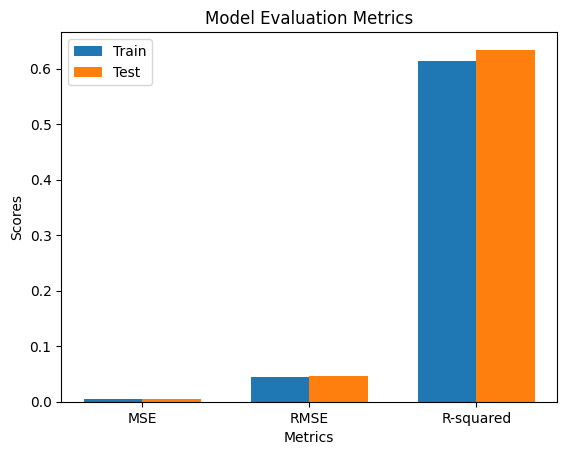

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your evaluation metrics
metrics = ['MSE', 'RMSE', 'R-squared']
train_scores = [mse_train, rmse_train, r2_train]
test_scores = [mse_test, rmse_test, r2_test]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(metrics))

# Create the bar chart
plt.bar(index, train_scores, bar_width, label='Train')
plt.bar(index + bar_width, test_scores, bar_width, label='Test')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Display the chart
plt.show()